# Validate HDF5 files

This quick notebook loads a behavenet HDF5 File as well as the corresponding .mat neural activity file (and the relevant batch_neural_idxs file for trial data).

It ZScores the raw .mat neural activity, and plots 10 random trials of both datasets to make sure they're the same. 

In [63]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import behavenet
from scipy.io import loadmat

In [72]:
session = '1'
data = h5py.File(behavenet.get_user_dir('data') + '/dipoppa/full_trial/MD0ST5/{}/data.hdf5'.format(session), 'a')
neural = data['neural']

all_na = loadmat('/home/yoni/behavenet/neural_dir/MD0ST5/2018-04-04/{}/neural_activity2018-04-04_{}_MD0ST5.mat'.format(session, session))['neural_activity']
batch_idxs = loadmat('/home/yoni/behavenet/neural_dir/MD0ST5/2018-04-04/{}/batch_neural_id2018-04-04_{}_MD0ST5.mat'.format(session, session))['batch_neural_id']

In [73]:
mean = all_na.mean(axis=0)
std = all_na.std(axis=0)
all_na = (all_na - mean) / std

In [74]:
print(all_na.mean(), all_na.std())

2.1760187e-09 1.0000007


trial_0154


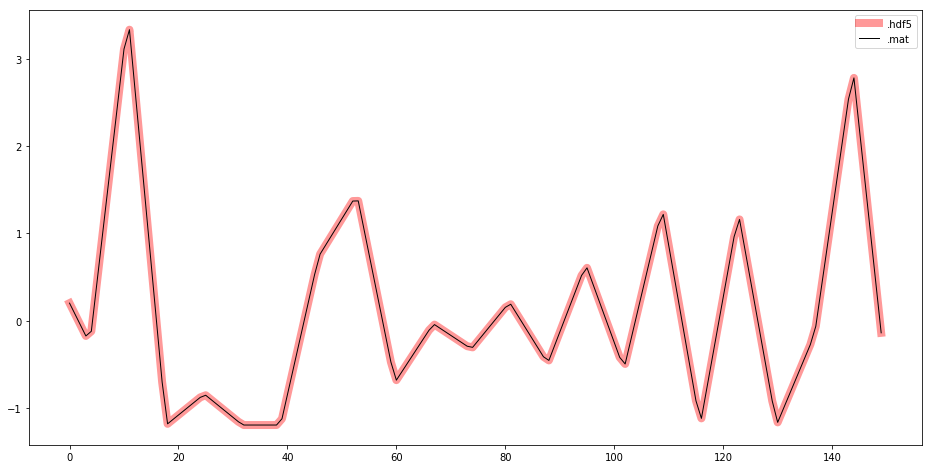

trial_0080


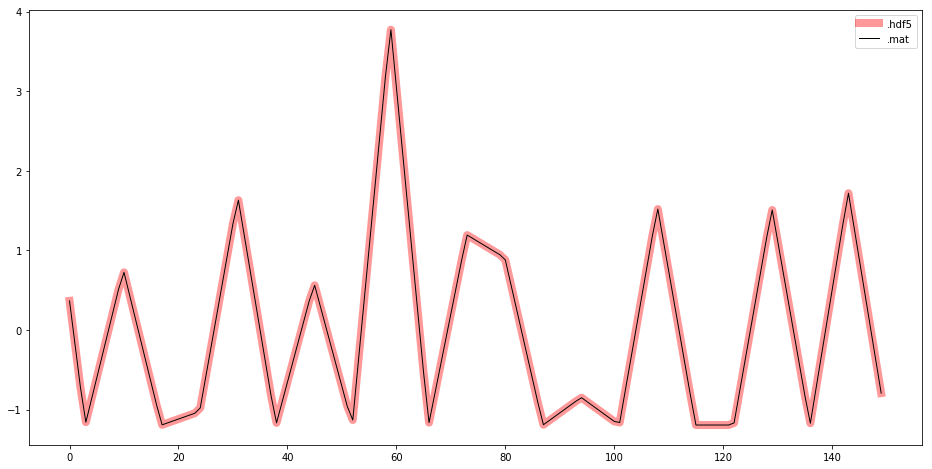

trial_0019


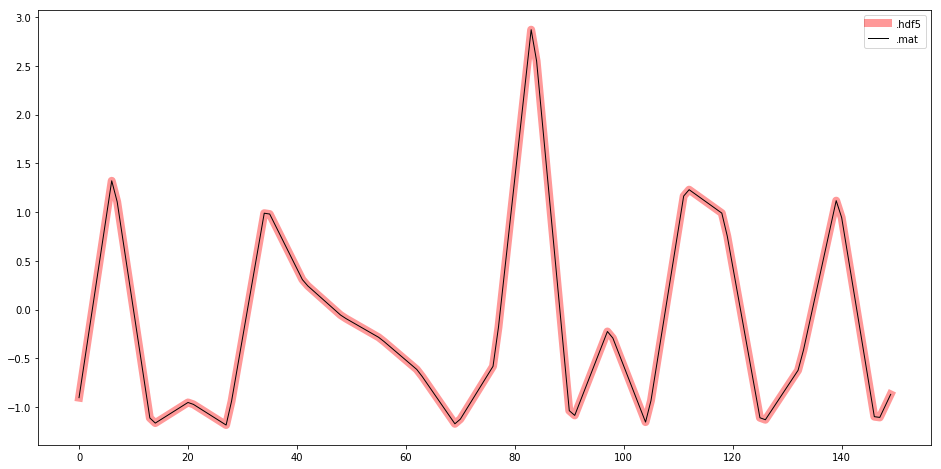

trial_0123


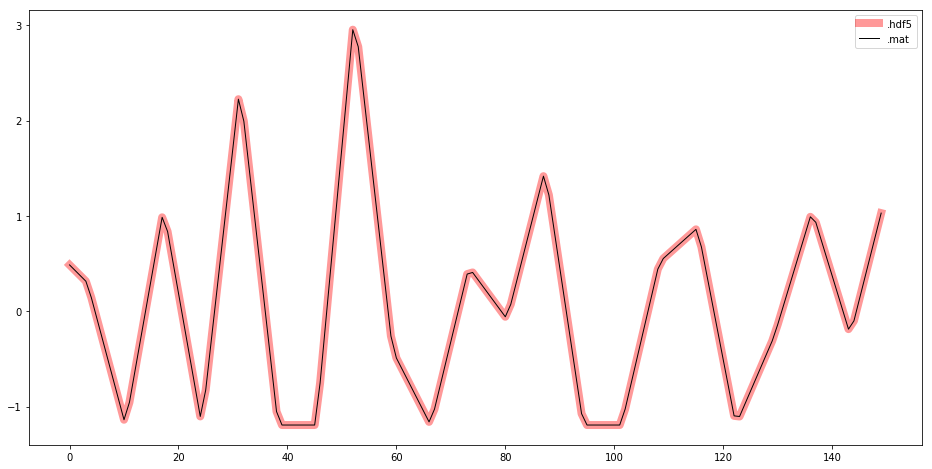

trial_0243


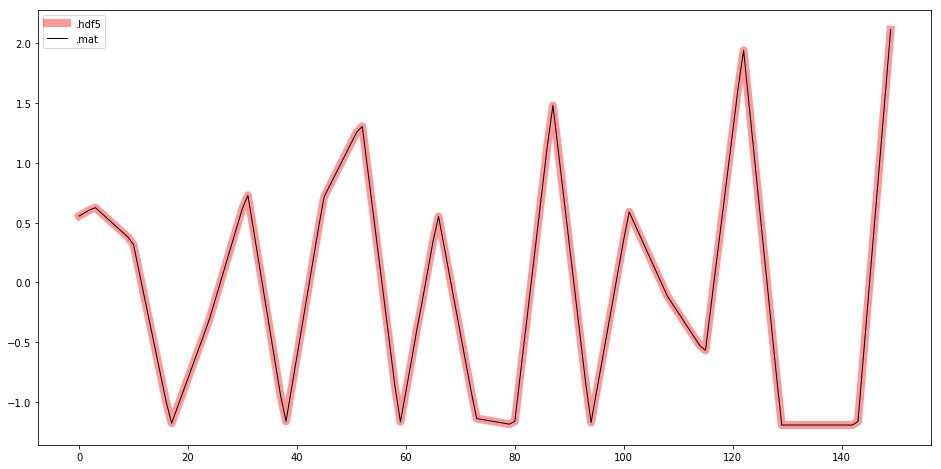

trial_0361


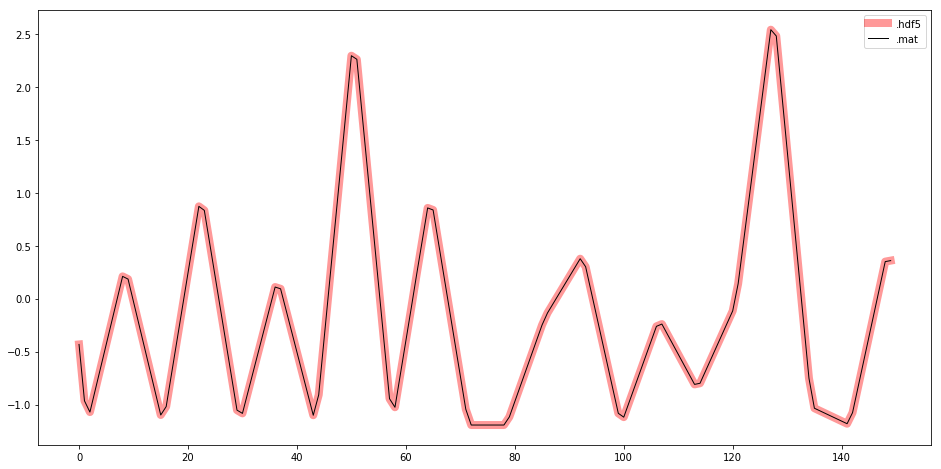

trial_0014


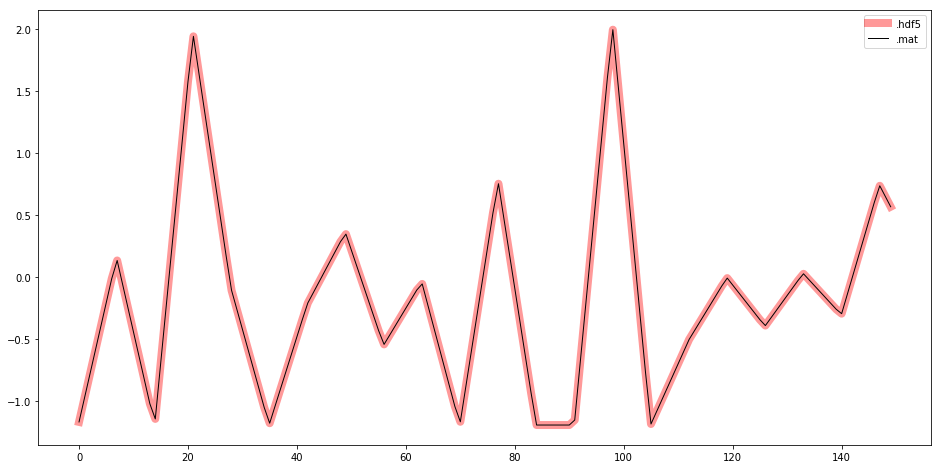

trial_0019


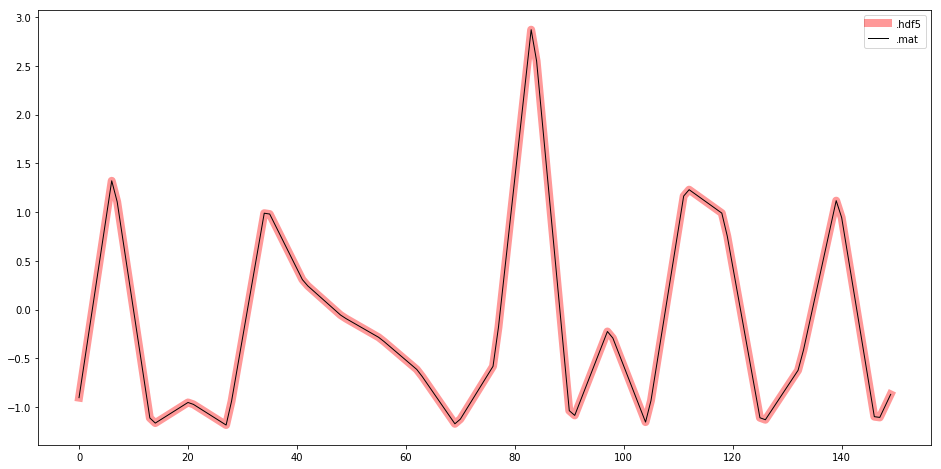

trial_0304


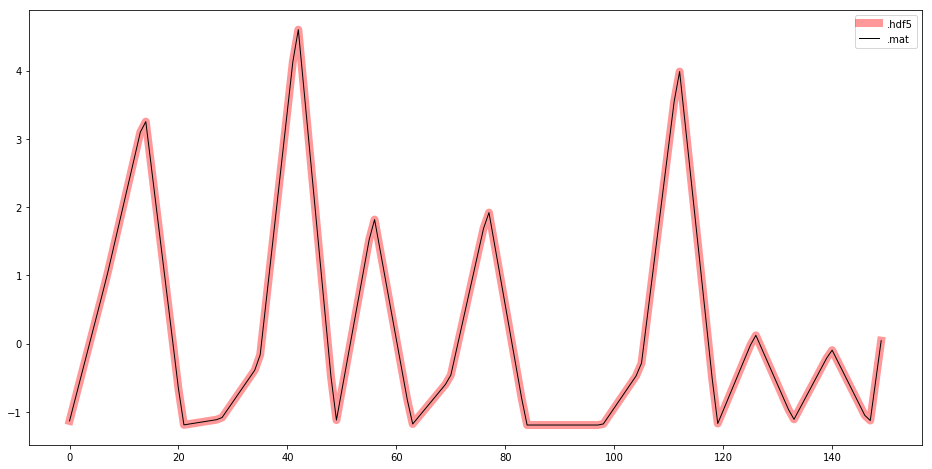

trial_0261


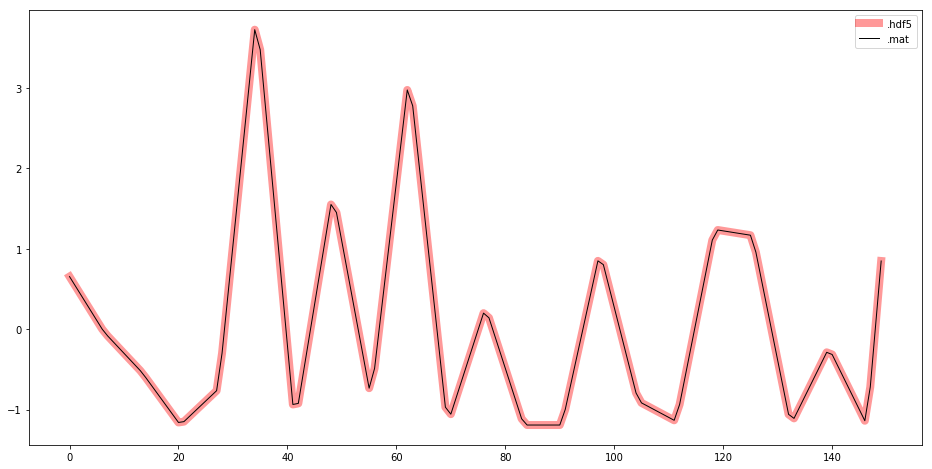

In [75]:
for i in range(10):
    fig = plt.figure(figsize=(16,8))
    idx = np.random.randint(0, len(batch_idxs[0]))
    
    trial_beg = batch_idxs[0, idx]
    trial_end = batch_idxs[1, idx]
    
    trial_name = 'trial_%04i'%idx
    
    print(trial_name)
    plt.plot(range(150), data['neural'][trial_name][:, 1], c='red', linewidth=8, label='.hdf5', alpha=0.4)
    plt.plot(range(0, 150), all_na[trial_beg-1:trial_end, 1], c='black', linewidth=1, label='.mat', alpha=0.99)
    plt.legend()
    
    plt.show()


In [76]:
np.any(np.isnan(all_na)), not np.all(np.isfinite(all_na))

(False, False)

In [77]:
data.close()